<a href="https://colab.research.google.com/github/m-d-nabeel/mnist-dataset/blob/main/MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Now Improving Our Model
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
# For neural network to produce better result we try to make out data in similar range
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# Used in model.fit()

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(1/4))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(1/4))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(1/8))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                      

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100 , validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
1875/1875 [==============================] - 19s 9ms/step - loss: 0.4244 - accuracy: 0.8691 - val_loss: 0.1372 - val_accuracy: 0.9573
Epoch 2/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2371 - accuracy: 0.9291 - val_loss: 0.1176 - val_accuracy: 0.9639
Epoch 3/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1980 - accuracy: 0.9407 - val_loss: 0.0962 - val_accuracy: 0.9700
Epoch 4/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1733 - accuracy: 0.9482 - val_loss: 0.0871 - val_accuracy: 0.9724
Epoch 5/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1560 - accuracy: 0.9529 - val_loss: 0.0795 - val_accuracy: 0.9746
Epoch 6/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1440 - accuracy: 0.9566 - val_loss: 0.0812 - val_accuracy: 0.9733
Epoch 7/100
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1323 - accuracy: 0.9591 - val_loss: 0.0721 -

In [ ]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred

array([[1.2362680e-05, 2.6928637e-07, 1.1913797e-08, ..., 9.9996620e-01,
        1.1787549e-06, 1.0635254e-05],
       [7.5350783e-07, 1.0114760e-05, 9.9992043e-01, ..., 4.2049064e-06,
        4.7143607e-05, 3.1720234e-08],
       [1.7148885e-05, 9.9971306e-01, 3.2832435e-05, ..., 7.2739572e-06,
        1.6424758e-05, 4.5209049e-07],
       ...,
       [6.1541666e-10, 2.5282691e-07, 8.5637639e-09, ..., 4.4461834e-07,
        1.7020718e-06, 1.6231197e-05],
       [1.7127081e-07, 6.5213430e-09, 2.1951406e-08, ..., 6.2322232e-09,
        6.2585379e-05, 5.5401134e-10],
       [8.2151155e-06, 4.7381283e-07, 6.4027080e-07, ..., 3.5125896e-07,
        1.6379571e-06, 6.9577636e-06]], dtype=float32)

In [ ]:
# y_pred = y_pred.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

Accuracy: 0.9847
Precision: 0.9847, Recall: 0.9846, F1-Score: 0.9846
Confusion Matrix:
 [[ 974    1    0    1    0    1    1    1    1    0]
 [   0 1129    3    0    0    0    2    0    1    0]
 [   3    0 1013    2    1    1    1    6    5    0]
 [   0    0    3  996    0    1    0    4    3    3]
 [   1    0    1    0  961    0    3    0    1   15]
 [   2    0    0    7    1  877    3    0    1    1]
 [   3    1    1    1    3    6  941    0    2    0]
 [   2    6    6    1    0    0    0 1008    3    2]
 [   2    1    1    4    2    2    0    3  958    1]
 [   1    3    0    5    3    2    1    2    2  990]]


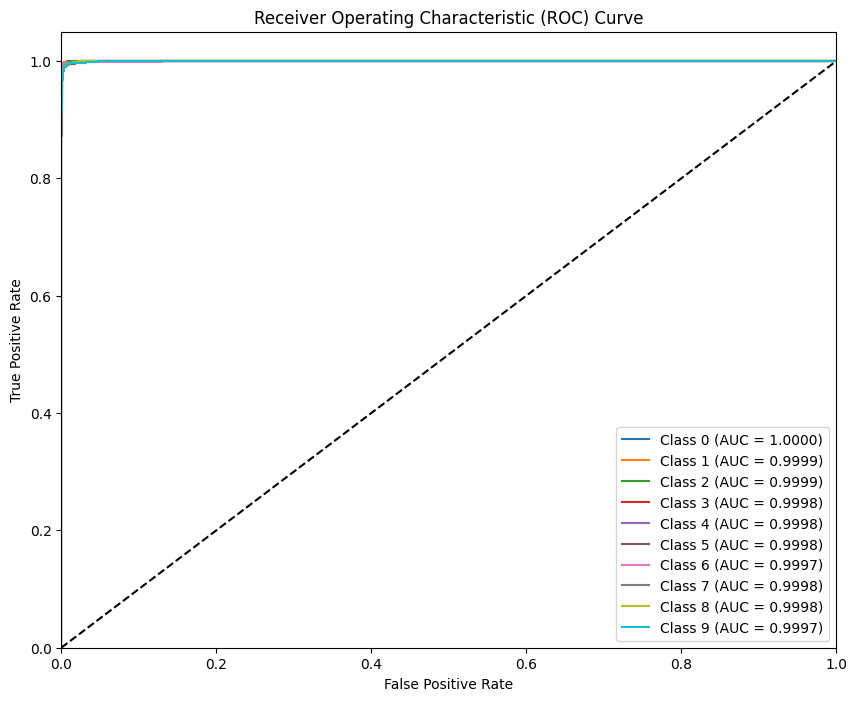

In [ ]:
from keras.utils import to_categorical
y_test = to_categorical(y_test, num_classes=10)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score (macro-averaged)
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Calculate ROC curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

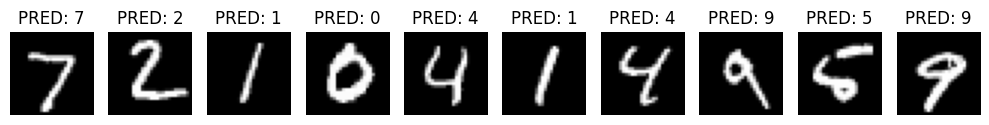

In [ ]:
import matplotlib.pyplot as plt

def print_images(X, y, n: int):
  """Print n images in a row"""
  plt.figure(figsize=(10, 5))
  for i in range(n):
      plt.subplot(1, n, i+1)
      plt.imshow(X[i], cmap='gray')
      plt.title(f"PRED: {y[i]}")
      plt.axis('off')
  plt.tight_layout()
  plt.show()

y_pred_max = y_pred.argmax(axis=1)
print_images(X_test,y_pred_max[:10], 10)

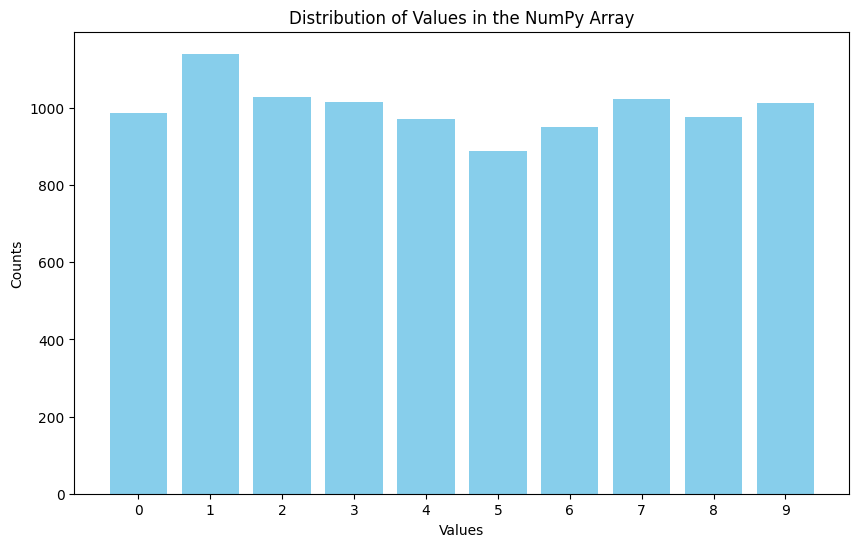

In [ ]:
from collections import Counter
counts = Counter(y_pred_max)

# Step 3: Prepare the data for plotting
values = list(counts.keys())
frequency = list(counts.values())

plt.figure(figsize=(10, 6))
plt.bar(values, frequency, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Distribution of Values in the NumPy Array')
plt.xticks(np.arange(0, 10, 1))

plt.show()

In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


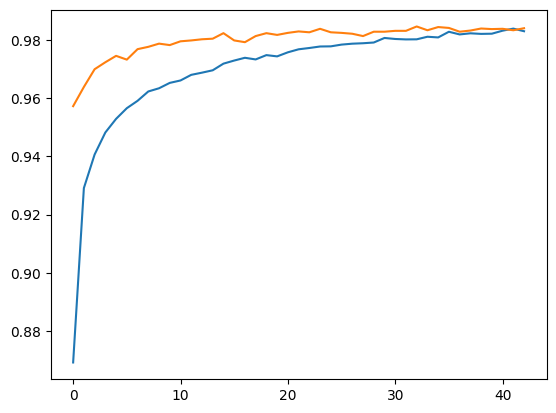

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

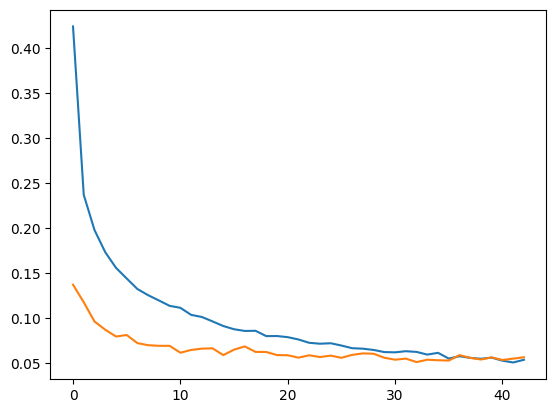

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
# Loading models and checking validity
from tensorflow.keras.models import load_model

In [ ]:
model = load_model("model.h5")

In [ ]:
from PIL import Image
import numpy as np
import requests
from io import BytesIO
from skimage.transform import resize

In [ ]:
image_urls = [
    "https://c8.alamy.com/comp/HXBRW4/5-red-handwritten-digits-over-white-background-HXBRW4.jpg",#5
    "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.7lzOmQXWoBQm1387vzH8ZwAAAA%26pid%3DApi&f=1&ipt=10aed34935691ec574728fccd22df415b558896078634bb536de5a7cf6c1930e&ipo=images",
    "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.stFF-u18aBTvJaHqmoJ5egHaF8%26pid%3DApi&f=1&ipt=76485d8e0fc07b442c724e4228c1f1a444211718caf7e66b47205bcaa7aa6486&ipo=images",
    "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fc8.alamy.com%2Fcomp%2FHXBRW0%2F2-red-handwritten-digits-over-white-background-HXBRW0.jpg&f=1&nofb=1&ipt=5becfc6ee6b5abe897fae56fa83c14cbc58704a98d8272cf751145e8ce6cfcc6&ipo=images",
    "https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fimage.shutterstock.com%2Fz%2Fstock-photo--red-handwritten-digits-over-white-background-68815291.jpg&f=1&nofb=1&ipt=b2ebceaff64591b9c0cd6a0b5b26586db8cf6d7cdca5ece437a8bc3dfb7e662b&ipo=images",
    "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fstatic5.depositphotos.com%2F1000943%2F465%2Fi%2F950%2Fdepositphotos_4652005-stock-photo-red-handwritten-digits.jpg&f=1&nofb=1&ipt=341f4f8de6bba2d4b1727a1bb7d08c54f8ff8d0120320720faa5bec52252f76d&ipo=images"
    ]

result = [
    5, 3, 8, 2, 3, 7
]

In [ ]:
images = []
for url in image_urls:
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    image = image.convert('L')
    images.append(np.array(image))

In [ ]:
preprocessed_images = []
for image in images:
    image = resize(image, (28, 28))
    image = image / 255.0
    if image.mean() > 0.5:
        image = 1.0 - image
    preprocessed_images.append(image)

preprocessed_images = np.array(preprocessed_images)

In [ ]:
predictions = model.predict(preprocessed_images)

1/1 [==============================] - 0s 186ms/step


In [ ]:
predicted_labels = np.argmax(predictions, axis=1)

In [ ]:
for i in range(len(predicted_labels)):
  print(f"Actual {result[i]}")
  print(predicted_labels[i])

Actual 5
8
Actual 3
8
Actual 8
8
Actual 2
8
Actual 3
8
Actual 7
8


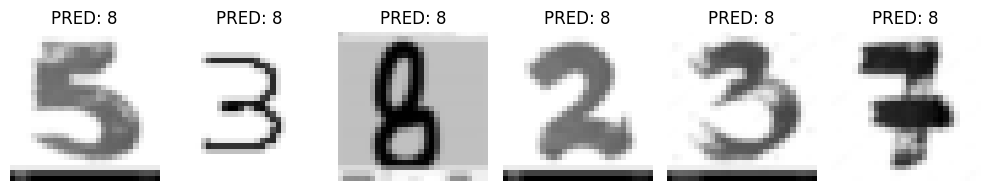

In [ ]:
print_images(preprocessed_images, predicted_labels, 6)